In [ ]:
#import the libraries
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def MAD( datalist ):
    z = []#empty list
    for i in datalist:
        z.append( np.abs( i - np.median(datalist) ) )
    return np.median(z)

10.700000000000001

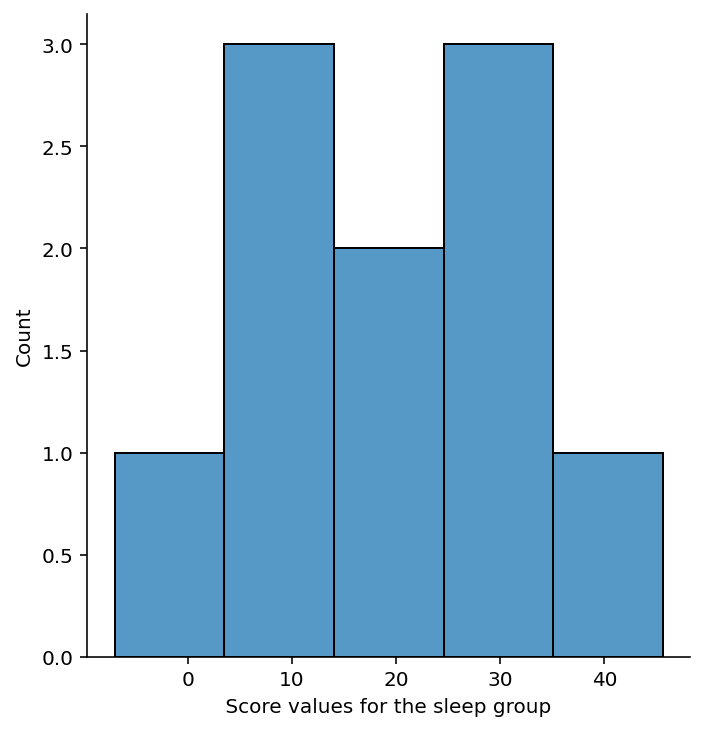

In [ ]:
group_sleep = np.array([-7.0, 11.6, 12.1, 12.6, 14.5, 18.6, 25.2, 30.5, 34.5, 45.6])
group_nosleep = np.array([-14.7, -10.7, -10.7, 2.2, 2.4, 4.5, 7.2, 9.6, 10.0, 21.3, 21.8, 22.])

#PLOT DATASET
p = sns.displot( data = group_sleep )
p.set( xlabel = ' Score values for the sleep group ' )

#CENTRAL TENDENCY VALUE WILL BE THE MEDIAN
med1 = np.median( group_sleep )
med2 = np.median( group_nosleep )

#DIFFERENCE IN MEDIAN VALUES
Mobs = med1 - med2 #observed meassure
Mobs

# Null Hypothesis Significance Test

$H_0$: Sleep deprivation had no effect (difference) and random chance alone produced the observed difference. 

This implies the **two samples** come from the **same distribution**,

and the **difference in the median should be zero**.

Let's test this NHST.

Layout:

1. **Couple the groups** together into the same population \(one box universe\).
2. **Randomly choice values** to go into a sleep group and a non\-sleep group from the one box universe.
3. Take the difference in the two groups median values \(**find effect size**\).
4. Perform these task multiple times \(**multiple simulations**\).



In [ ]:
decenter_list = []
for i in group_sleep:
    decenter = i - np.median( group_sleep )
    decenter_list.append( decenter )
    
np.median( decenter_list )

0.0

In [ ]:
print( group_sleep )
group_sleep - np.median( group_sleep )

[-7.  11.6 12.1 12.6 14.5 18.6 25.2 30.5 34.5 45.6]


array([-23.55,  -4.95,  -4.45,  -3.95,  -2.05,   2.05,   8.65,  13.95,
        17.95,  29.05])

0.0

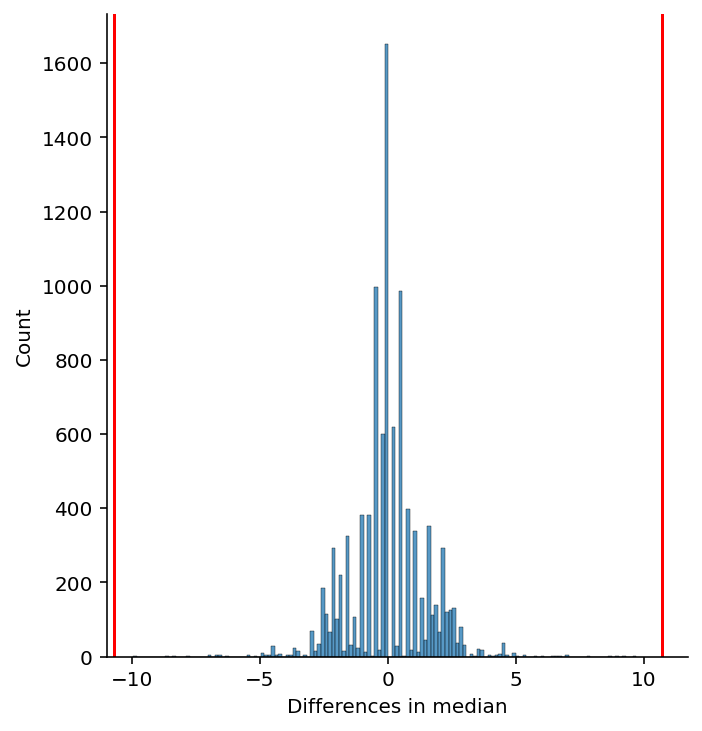

In [ ]:
#MULTIPLE SIMULATIONS
#FOR LOOPS

#COUPLED TOGETHER THE GROUPS USING THE np.concatenate()

boxmodel = np.concatenate( [ group_sleep , group_nosleep ] ) #joining the two datasets

simulations = range( 10000 )
sample_size1 = len( group_sleep )
sample_size2 = len( group_nosleep )

dlist = [ ] #empty list containing difference in median
#PERFORM SIMULATIONS
for i in simulations: #for each simulations
    resample1 = np.random.choice( boxmodel , 100 ) #sleep group
    resample2 = np.random.choice( boxmodel , 100 ) #non-sleep group
    
    #FIND THE MEDIANS
    m1 = np.median( resample1 )
    m2 = np.median( resample2 )
    
    #DIFFERENCE IN MEDIAN
    d = m1 - m2
    dlist.append( d )

#PLOT DISTRIBUTION
p = sns.displot( data = dlist )
p.set( xlabel = 'Differences in median' )
plt.axvline( Mobs , color = 'r' )
plt.axvline( -Mobs , color = 'r' )

#TWO-TAILED PVALUE
darray = np.array( dlist ) #list to array
extreme_left =  np.sum( darray <= -Mobs )
extreme_right =  np.sum( darray >= Mobs )
extreme_total = extreme_left + extreme_right

pvalue2 = extreme_total / len( darray )
pvalue2

## Calculate \(ONE TAILED\) p\-value



In [ ]:
#COUNT HOW MANY OF OUR SIMULATIONS GAVE US A RESULT AS EXTREME AS OUR OBSERVED RESULT
#FIND EXTREME CASES
#MEDIAN DIFFERENCES

darray = np.array( dlist ) #list to array

extreme_right =  np.sum( darray >= Mobs )

pvalue = extreme_right / len( darray )

pvalue

0.0601

## Calculate \(TWO TAILED\) p\-value



In [ ]:
extreme_left =  np.sum( darray <= -Mobs )
extreme_total = extreme_left + extreme_right

pvalue2 = extreme_total / len( darray )
pvalue2

0.1223

# Confidence Interval



In [ ]:
#MULTIPLE SIMULATIONS
#NEED TO FIND AN INTERVAL WHICH CONTAINS THE EFFECT SIZE
#SAMPLE FROM EACH DATSET

simulations = range( 10000 )
sample_size1 = len( group_sleep )
sample_size2 = len( group_nosleep )

dlist = [ ] #empty list containing difference in median
#PERFORM SIMULATIONS
for i in simulations: #for each simulations
    resample1 = np.random.choice( group_sleep , sample_size1 ) #sleep group
    resample2 = np.random.choice( group_nosleep , sample_size2 ) #non-sleep group
    
    #FIND THE MEDIANS
    m1 = np.median( resample1 )
    m2 = np.median( resample2 )
    
    #DIFFERENCE IN MEDIAN
    d = m1 - m2
    dlist.append( d )


 [  -12.599999999999998  ,  28.200000000000003  ] 


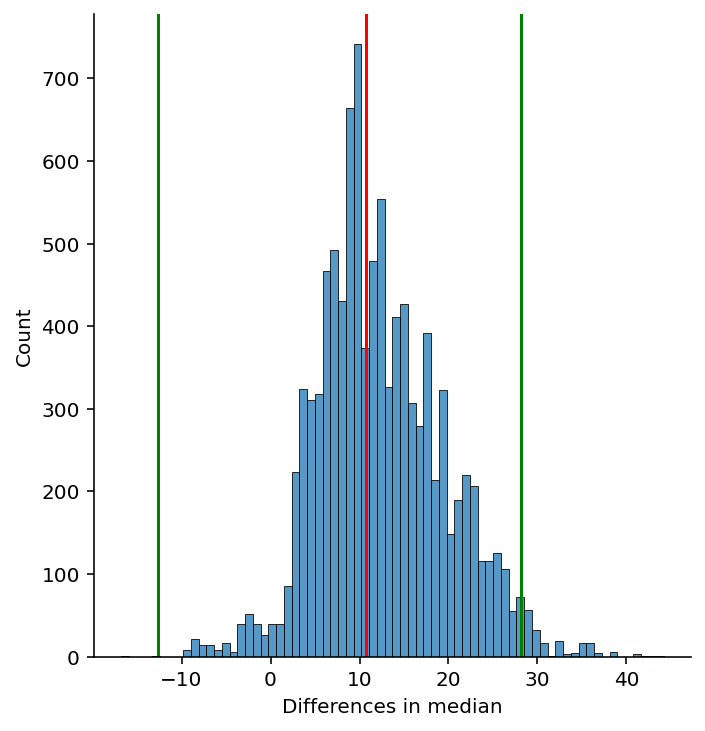

In [ ]:
#SORT THE DATA
sorted_d = sorted( dlist )

#FIND 50TH AND 9950 PERCENTILE
Mlower = sorted_d[49]
Mupper = sorted_d[9949]

#FIND CI
lowerbound = 2 * Mobs - Mupper
higherbound = 2 * Mobs - Mlower

print( ' [ ' , lowerbound , ' , ' , higherbound , ' ] ' )

#PLOT DISTRIBUTION
p = sns.displot( data = dlist )
p.set( xlabel = 'Differences in median' )
plt.axvline( Mobs , color = 'r' )
plt.axvline( lowerbound , color = 'g' )
plt.axvline( higherbound , color = 'g' )

## Exercise 5 in HW4

Because each dataset small, we need to perform a ranked analysis.

Layout:

1. **Group** both datasets together.
2. **Rank** the combined datasets.
3. **Separate** the ranks of each dataset.
4. **Perform analysis** on the rank's of the data.



In [ ]:
#BEFORE PERFORMING THE ANALYSIS WE NEED TO IMPORT A FUNCTION TO RANK THE DATA
from scipy.stats import rankdata # importing rank function
import numpy as np

remedy = [3.5,2.75,4.25,1.5,2.25,3.5] #dataset 1
placebo = [5.25,3.5,4.25,5.75,6.75] #dataset 2

#STEP 1:
full = np.concatenate([remedy,placebo]) # combine data

print( full )

#STEP 2:
rank = rankdata(full) # rank the combined data

print( rank )

#STEP 3:
remedy_ranks = rank[0:6] #assign the 1st 6 ranks to the remedy group
placebo_ranks = rank[6:11] # assign the next 5 ranks to the placebo group

#STEP 4:
#FIND DIFFERENCE IN MEAN
mean_remedy = np.mean( remedy_ranks )
mean_placebo = np.mean( placebo_ranks )

#FIND EFFECT SIZE
mean_remedy - mean_placebo

[3.5  2.75 4.25 1.5  2.25 3.5  5.25 3.5  4.25 5.75 6.75]
[ 5.   3.   7.5  1.   2.   5.   9.   5.   7.5 10.  11. ]


-4.583333333333334